In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import cv2
import os 
import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/neural_lab/basedata/train/well_animals"

10.jpg	14.jpg	18.jpg	21.jpg	25.jpg	29.jpg	4.jpg  8.jpg
11.jpg	15.jpg	19.jpg	22.jpg	26.jpg	2.jpg	5.jpg  9.jpg
12.jpg	16.jpg	1.jpg	23.jpg	27.jpg	30.jpg	6.jpg  index.jpg
13.jpg	17.jpg	20.jpg	24.jpg	28.jpg	3.jpg	7.jpg


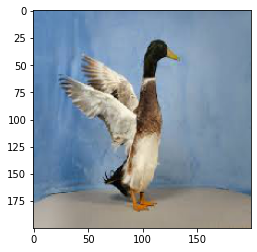

In [ ]:
img = image.load_img("/content/drive/My Drive/Colab Notebooks/neural_lab/basedata/train/well_animals/7.jpg" , target_size=(200, 200))
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/My Drive/Colab Notebooks/neural_lab/basedata/train/well_animals/9.jpg").shape

(194, 259, 3)

In [ ]:
train = ImageDataGenerator(rescale = 1/191)
validation = ImageDataGenerator(rescale = 1/191)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('accuracy') > .98) & (logs.get('val_accuracy') > .9):
            print("Reached 98% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/191)
validation_datagen = ImageDataGenerator(rescale=1/191)


train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/neural_lab/basedata/train/',
        target_size=(100, 100),
        batch_size=128,
        class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/neural_lab/basedata/validation/',
        target_size=(100, 100),
        batch_size=128,

        class_mode='binary')

Found 59 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'sick_animals': 0, 'well_animals': 1}

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=1,  
      epochs=30,
      validation_data = validation_generator,callbacks=[callbacks])

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 0.6892 - accuracy: 0.5085 - val_loss: 3.4694 - val_accuracy: 0.5200
Epoch 2/30
1/1 [==============================] - 0s 187ms/step - loss: 3.1155 - accuracy: 0.5254 - val_loss: 3.0144 - val_accuracy: 0.4800
Epoch 3/30
1/1 [==============================] - 0s 172ms/step - loss: 3.0900 - accuracy: 0.4746 - val_loss: 0.6959 - val_accuracy: 0.4800
Epoch 4/30
1/1 [==============================] - 0s 204ms/step - loss: 0.6917 - accuracy: 0.4915 - val_loss: 0.6740 - val_accuracy: 0.5200
Epoch 5/30
1/1 [==============================] - 0s 179ms/step - loss: 0.6691 - accuracy: 0.5085 - val_loss: 0.7896 - val_accuracy: 0.5200
Epoch 6/30
1/1 [==============================] - 0s 179ms/step - loss: 0.7463 - accuracy: 0.5254 - val_loss: 0.7287 - val_accuracy: 0.4800
Epoch 7/30
1/1 [==============================] - 0s 186ms/step - loss: 0.7365 - accuracy: 0.4746 - val_loss: 0.6516 - val_accuracy: 0.5600
Epoch 8/30
1/1 [=======

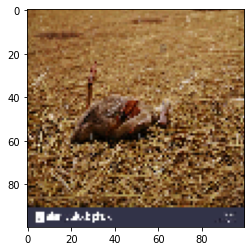

sick animals


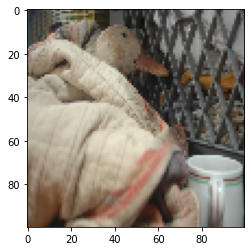

sick animals


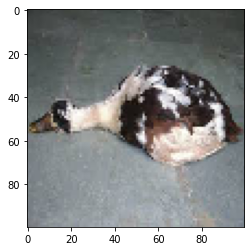

sick animals


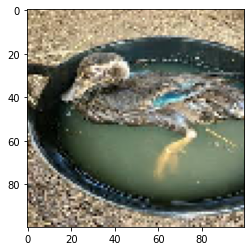

sick animals


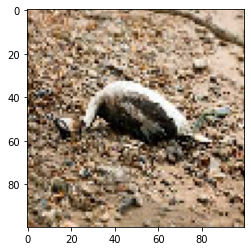

sick animals


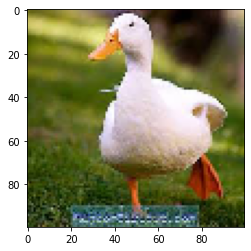

well animals


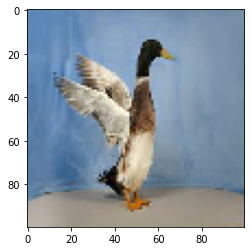

well animals


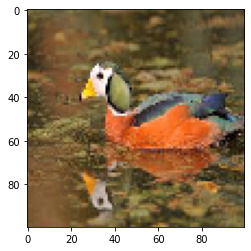

well animals


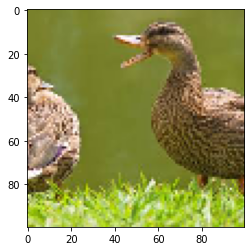

well animals


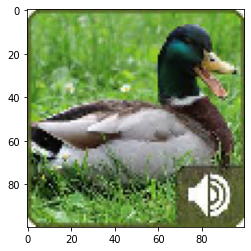

well animals


In [ ]:
dir_path = "/content/drive/My Drive/Colab Notebooks/neural_lab/basedata/testing/well"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i , target_size=(100, 100))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes =model.predict(images)
    if classes[0]==0:
        print("sick duck")
    else:
        print("well duck")